In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

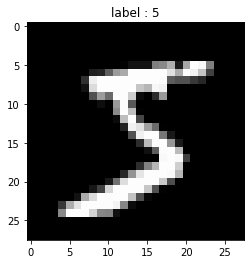

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

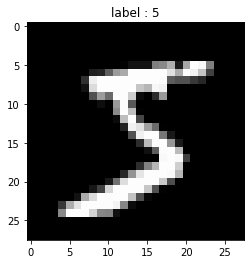

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

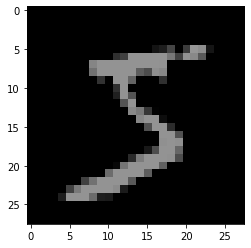

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train.shape) # (12000, 784)
print(y_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [11]:
y_train = enc.transform(y_train[:, np.newaxis])
y_val = enc.transform(y_val[:, np.newaxis])
print(np.shape(y_train))
print(np.shape(y_val))

(48000, 10)
(12000, 10)


In [12]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [13]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

# print(len(get_mini_batch)) # 2400
# print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

In [14]:
# お試し -----
print(np.array([[1,2,3],[4,5,6]]).shape)
print(np.array([1,2,3]).shape)
xx = np.array([[1,2,3], [2,3,4]])
yy = np.array([1,2,3])
print(xx.shape)
print(yy.shape)
print(xx - yy)
# -------------

(2, 3)
(3,)
(2, 3)
(3,)
[[0 0 0]
 [1 1 1]]


In [15]:
# 問題1, 2, 3, 4, 5
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, epoch = 1, alpha = 0.1, batch_size = 20, activation_func = "tanh", verbose = True):
        self.verbose = verbose
        self.alpha = alpha
        self.epoch = epoch
        self.batch_size = batch_size
        self.activation_func = activation_func
        sigma = 0.01
        n_features = 784
        n_nodes1 = 400
        n_nodes2 = 200
        n_output = 10

        self.loss = []
        self.loss_val = []
        self.loss_per_epoch = []
        self.loss_val_per_epoch = []

        self.W1 = init_gaussian_w(sigma, n_features, n_nodes1)
        self.B1 = init_gaussian_w(sigma, 1, n_nodes1)

        self.W2 = init_gaussian_w(sigma, n_nodes1, n_nodes2)
        self.B2 = init_gaussian_w(sigma, 1, n_nodes2)

        self.W3 = init_gaussian_w(sigma, n_nodes2, n_output)
        self.B3 = init_gaussian_w(sigma, 1, n_output)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        for i in range(self.epoch):
            # この二つは参考値なので最後のepoch分だけ保存
            self.loss = []
            self.loss_val = []
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            for mini_X_train, mini_y_train in get_mini_batch:

                self.__forward(mini_X_train)
                self.__backward(mini_X_train, mini_y_train)

                self.loss.append(self.__error_func(self.Z3, mini_y_train))
                self.loss_val.append(self.__error_func(self.__forward(X_val), y_val))

                if self.verbose:
                    #verboseをTrueにした際は学習過程などを出力する
                    print("損失値: {}(学習), {}(テスト)".format(self.loss[-1], self.loss_val[-1]))

            self.loss_per_epoch.append(self.loss[-1])
            self.loss_val_per_epoch.append(self.loss_val[-1])
            if self.verbose:
                #verboseをTrueにした際は学習過程などを出力する
                print("epoch {}:: 損失値: {}(学習), {}(テスト)".format(i, self.loss_per_epoch[i], self.loss_val_per_epoch[i]))

        

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        #         return self.__forward(X)
        return np.argmax(self.__forward(X), axis=1)

    def __forward(self, X):
        # 1層目
        self.A1 = np.dot(X, self.W1) + self.B1
        self.Z1 = self.__activation_func(self.A1)
        # 2層目
        self.A2 = np.dot(self.Z1, self.W2) + self.B2
        self.Z2 = self.__activation_func(self.A2)
        # 2層目
        self.A3 = np.dot(self.Z2, self.W3) + self.B3
        self.Z3 = softmax(self.A3)
        
        return self.Z3
        
    def __backward(self, X, y):
        # 3層目
        dL_dA3 = (1 / self.batch_size) * (self.Z3 - y)
        dL_dB3 = np.sum(dL_dA3, axis=0)
        dL_dW3 = np.dot(self.Z2.T, dL_dA3)
        dL_dZ2 =  np.dot(dL_dA3, self.W3.T)

        # 2層目
        dL_dA2 = np.multiply(dL_dZ2, (self.__der_activation_func(self.A2)))
        dL_dB2 = np.sum(dL_dA2, axis=0)
        dL_dW2= np.dot(self.Z1.T, dL_dA2)
        dL_dZ1 =  np.dot(dL_dA2, self.W2.T)

        # １層目
        dL_dA1 = np.multiply(dL_dZ1, (self.__der_activation_func(self.A1)))
        dL_dB1 = np.sum(dL_dA1, axis=0)
        dL_dW1 = np.dot(X.T, dL_dA1)
        
        # 重み、バイアス更新
        self.W3 -= self.alpha * dL_dW3
        self.W2 -= self.alpha * dL_dW2
        self.W1 -= self.alpha * dL_dW1
        self.B3 -= self.alpha * dL_dB3
        self.B2 -= self.alpha * dL_dB2
        self.B1 -= self.alpha * dL_dB1
        
    def __activation_func(self, X):
        result = []
        if self.activation_func == "sigmoid":
            result = sigmoid(X)
        elif self.activation_func == "tanh":
            result =  tanh(X)

        return result
    
    def __der_activation_func(self, X):
        result = []
        if self.activation_func == "sigmoid":
            result = der_sigmoid(X)
        elif self.activation_func == "tanh":
            result = der_tanh(X)

        return result

    def __error_func(self, pred_y, y):
#         print("pred_y --> {}".format(pred_y.shape))
#         print("y --> {}".format(y.shape))
        return -1 * np.sum(y * np.log(pred_y + 1e-7)) / len(y)

def init_gaussian_w(sigma, n_features, n_nodes):
    return sigma * np.random.randn(n_features, n_nodes)

def sigmoid(X):
    return 1.0 / (1.0 + np.exp(-X))

def der_sigmoid(X):
    return sigmoid(X) * (1.0 - sigmoid(X))

def tanh(X):
    return (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

def der_tanh(X):
    return 1.0 - (tanh(X) ** 2)

def softmax(X):
    return  np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)


In [16]:
%%time

snn_tanh = ScratchSimpleNeuralNetrowkClassifier(epoch = 3, verbose=False)
snn_tanh.fit(X_train, y_train, X_val, y_val)

CPU times: user 1h 45min 3s, sys: 13min 51s, total: 1h 58min 54s
Wall time: 31min 31s


In [17]:
pred_y_test = snn_tanh.predict(X_test)

In [18]:
print(pred_y_test.shape)
print(np.max(pred_y_test))
print(np.min(pred_y_test))
print(np.max(y_test))
print(np.min(y_test))
print(pred_y_test)
print(y_test)

(10000,)
9
0
9
0
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def eval_accuracy(model, X_test, y_test, model_name):
    pred_y = snn_tanh.predict(X_test)
    nn_result = pd.DataFrame(
        [accuracy_score(y_test, pred_y), precision_score(y_test, pred_y, average='micro'), recall_score(y_test, pred_y, average='micro')],
        index=['Accuracy', 'Precision', 'Recall'],
        columns=[model_name]
    )
    return nn_result

# 問題6 損失値の推移
def display_loss_graph(model):
    iter_list = list(range(len(model.loss)))
    plt.scatter(iter_list, model.loss, label="train loss")
    plt.scatter(iter_list, model.loss_val, label="test loss")
    plt.ylabel('loss')
    plt.xlabel('iter')
    plt.legend()
    plt.show()

    iter_list = list(range(len(model.loss_per_epoch)))
    plt.scatter(iter_list, model.loss_per_epoch, label="train loss")
    plt.scatter(iter_list, model.loss_val_per_epoch, label="test loss")
    plt.ylabel('loss')
    plt.xlabel('iter')
    plt.legend()
    plt.show()

In [20]:
 # 問題 6 活性関数がtanhの場合
nn_tanh_result = eval_accuracy(snn_tanh, X_test, y_test, "nn tanh")
nn_tanh_result

,nn tanh
Accuracy,0.9565
Precision,0.9565
Recall,0.9565


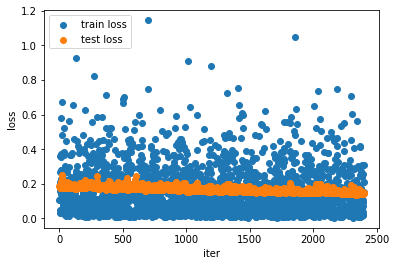

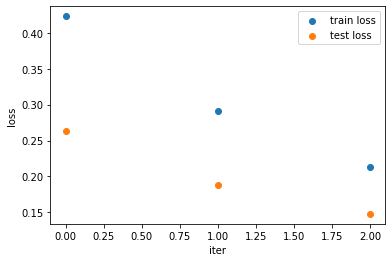

In [21]:
 # 問題 7 活性関数がtanhの場合
display_loss_graph(snn_tanh)

一つ目のプロットは最後のepochの時のminibatchのloop単位の損失関数、再度のepochなのでテストは大体収束してるが、trainは収束してない、
もちろんminibatchが20なので選ばれるデータによってばらつきが起こるのはわかるが、
ある程度重みとバイアスが最適化された後なので、そんなにばらつくイメージがなかったが、結果ばらついた。

二つ目のプロットより、epoch単位ではloss関数はepochを重ねる毎に減少していっていることがわかる。

In [22]:
%%time
snn_sigmoid = ScratchSimpleNeuralNetrowkClassifier(epoch = 3, activation_func = "sigmoid", verbose=False)
snn_sigmoid.fit(X_train, y_train, X_val, y_val)

CPU times: user 1h 5min 32s, sys: 6min 40s, total: 1h 12min 13s
Wall time: 18min 26s


In [23]:
 # 問題 6 活性関数がsigmoidの場合
nn_sigmoid_result = eval_accuracy(snn_sigmoid, X_test, y_test, "nn sigmoid")
nn_sigmoid_result

,nn sigmoid
Accuracy,0.9565
Precision,0.9565
Recall,0.9565


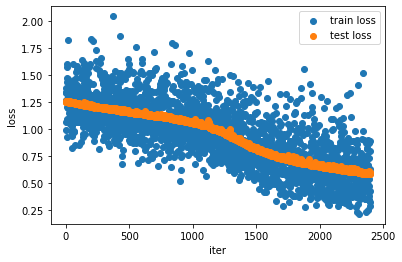

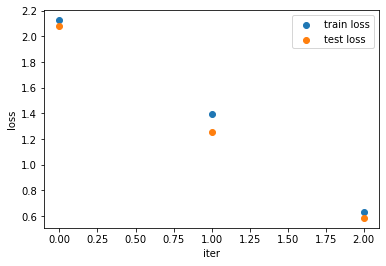

In [24]:
 # 問題 7 活性関数がsigmoidの場合
display_loss_graph(snn_sigmoid)

#### 考察

- epochの1 loop単位で10分弱かかる。遅い。なぜ遅いか別途検討したい
- accuraryは、epochが1の場合0.83ぐらい2,3になると0.94ぐらいの精度になるので、epochは計算リソースが許す限り多い方がいい
- sigmoidでもtanhでもaccuraryは変わらなかった。

In [25]:
 # 問題 8
def check_missmatch(y_pred, y_val):
    """
    語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

    Parameters:
    ----------
    y_pred : 推定値のndarray (n_samples,)
    y_val : 検証データの正解ラベル(n_samples,)
    X_val : 検証データの特徴量（n_samples, n_features)
    """
    import numpy as np
    import matplotlib.pyplot as plt


    num = 36 # いくつ表示するか

    true_false = y_pred==y_val
    false_list = np.where(true_false==False)[0].astype(np.int)

    if false_list.shape[0] < num:
        num = false_list.shape[0]
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
    for i in range(num):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
        ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

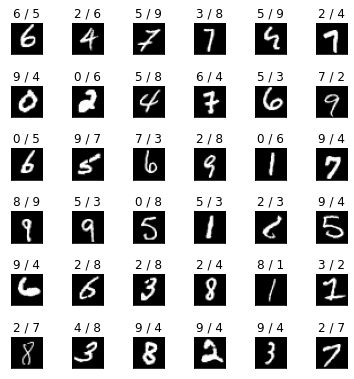

In [26]:
check_missmatch(pred_y_test, y_test)